# V0.1.6 - System Identification Using Adaptative Filters

Example created by Wilson Rocha Lacerda Junior

## Generating 1 input 1 output sample data  

The data is generated by simulating the following model:

$y_k = 0.2y_{k-1} + 0.1y_{k-1}x_{k-1} + 0.9x_{k-1} + e_{k}$

If *colored_noise* is set to True:

$e_{k} = 0.8\nu_{k-1} + \nu_{k}$

where $x$ is a uniformly distributed random variable and $\nu$ is a gaussian distributed variable with $\mu=0$ and $\sigma=0.1$

In the next example we will generate a data with 1000 samples with white noise and selecting 90% of the data to train the model. 

In [ ]:
pip install sysidentpy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sysidentpy.polynomial_basis import PolynomialNarmax
from sysidentpy.metrics import root_relative_squared_error
from sysidentpy.utils.generate_data import get_miso_data, get_siso_data
from sysidentpy.parameter_estimation import Estimators

x_train, x_valid, y_train, y_valid = get_siso_data(n=1000,
                                                   colored_noise=False,
                                                   sigma=0.001,
                                                   train_percentage=90)

One can create a model object and access the Adaptative Filters available in SysIdentPy individually. If you want to build a regressor matrix and estimate the parameters using only the Adaptative Filter method (not applying FROLS + ERR algorithm), follow the steps bellow.

In [3]:
model = PolynomialNarmax()
psi = model.build_information_matrix(x_train, y_train, xlag=2, ylag=1, non_degree=2) # creating the regressor matrix
pd.DataFrame(psi).head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.000000,-0.488925,-0.242635,0.000000,-0.000000,-0.000000,0.239048,0.118630,0.058872
1,1.0,-0.217385,0.969823,-0.488925,0.047256,-0.210825,0.106285,0.940557,-0.474171,0.239048
2,1.0,-0.503772,-0.628457,0.969823,0.253787,0.316599,-0.488570,0.394958,-0.609492,0.940557
3,1.0,0.804358,0.308975,-0.628457,0.646992,0.248526,-0.505505,0.095465,-0.194177,0.394958
4,1.0,-0.379308,-0.442970,0.308975,0.143875,0.168022,-0.117197,0.196222,-0.136867,0.095465


In [5]:
[regressor_code, max_lag] = model.regressor_space(2, 2, 1, 1)
regressor_code # the entire regressor space is our input in this case. But you can define specific subsets to use as an input

array([[   0,    0],
       [1001,    0],
       [2001,    0],
       [2002,    0],
       [1001, 1001],
       [2001, 1001],
       [2002, 1001],
       [2001, 2001],
       [2002, 2001],
       [2002, 2002]])

In [6]:
model.final_model = regressor_code # defines the model representation
model.psi = psi

Here we are using the Affine Least Mean Squares method, but you can use any of the methods available on SysIdentPy

- Least Mean Squares (LMS)
- Affine LMS
- LMS Sign Error
- Normalized LMS
- Normalized LSM Sign Error
- LSM Sign Regressor
- Normalized LMS Sign Regressor
- LMS Sign-Sign
- Normalized LMS Sign-Sign
- Normalized LMS Leaky
- LMS Leaky
- LMS Mixed Norm
- LMS Fourth

Also, you can use:
- Least Squares (LS)
- Total LS
- Recursive LS

## Building the model

In [7]:
model.theta = Estimators(mu=0.01).affine_least_mean_squares(model.psi,  y_train[1:, 0].reshape(-1, 1)) 

## Simulating the model

0.0024097628318461625
       Regressors Parameters         ERR
0               1    -0.0000  0.00000000
1          y(k-1)     0.1999  0.00000000
2         x1(k-1)    -0.0000  0.00000000
3         x1(k-2)     0.8999  0.00000000
4        y(k-1)^2    -0.0001  0.00000000
5   x1(k-1)y(k-1)     0.1000  0.00000000
6   x1(k-2)y(k-1)    -0.0000  0.00000000
7       x1(k-1)^2     0.0002  0.00000000
8  x1(k-2)x1(k-1)    -0.0000  0.00000000
9       x1(k-2)^2     0.0000  0.00000000


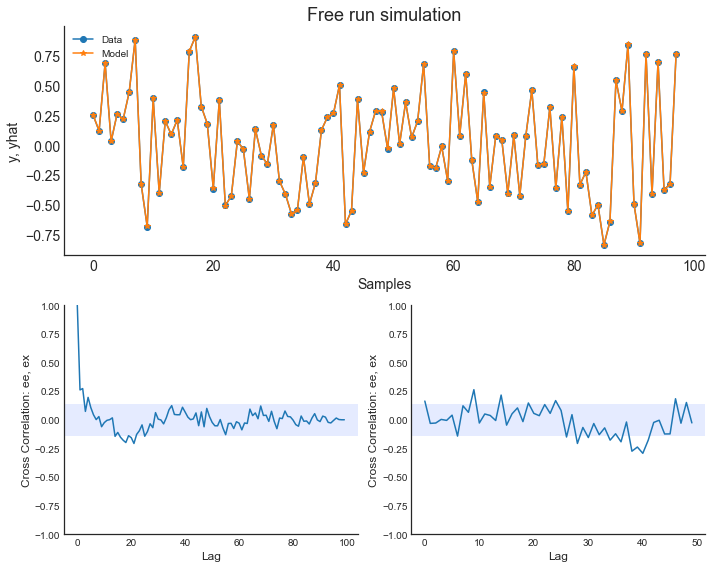

In [8]:
yhat = model.predict(x_valid, y_valid)
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)
model.n_terms = 10 # the number of terms we selected (necessary in the 'results' methods)
model.err = model.n_terms*[0] # just to use the `results` method
results = pd.DataFrame(model.results(err_precision=8,
                                     dtype='dec'),
                       columns=['Regressors', 'Parameters', 'ERR'])

print(results)
ee, ex, extras, lam = model.residuals(x_valid, y_valid, yhat)
model.plot_result(y_valid, yhat, ee, ex)

## Final code

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sysidentpy.polynomial_basis import PolynomialNarmax
from sysidentpy.metrics import root_relative_squared_error
from sysidentpy.utils.generate_data import get_miso_data, get_siso_data
from sysidentpy.parameter_estimation import Estimators

x_train, x_valid, y_train, y_valid = get_siso_data(n=1000,
                                                   colored_noise=False,
                                                   sigma=0.001,
                                                   train_percentage=90)

model = PolynomialNarmax()
psi = model.build_information_matrix(x_train, y_train, xlag=2, ylag=1, non_degree=2) # creating the regressor matrix
[regressor_code, max_lag] = model.regressor_space(2, 2, 1, 1)
regressor_code # the entire regressor space is our input in this case. But you can define specific subsets to use as an input
model.final_model = regressor_code # defines the model representation
model.psi = psi
model.theta = Estimators(mu=0.01).affine_least_mean_squares(model.psi,  y_train[1:, 0].reshape(-1, 1))
yhat = model.predict(x_valid, y_valid)
rrse = root_relative_squared_error(y_valid, yhat)
print(rrse)
model.n_terms = 10 # the number of terms we selected (necessary in the 'results' methods)
model.err = model.n_terms*[0] # just to use the `results` method
results = pd.DataFrame(model.results(err_precision=8,
                                     dtype='dec'),
                       columns=['Regressors', 'Parameters', 'ERR'])

print(results)
ee, ex, extras, lam = model.residuals(x_valid, y_valid, yhat)
model.plot_result(y_valid, yhat, ee, ex)